In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
chocolate <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')

Rows: 2530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): company_manufacturer, company_location, country_of_bean_origin, spe...
dbl (3): ref, review_date, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
chocolate |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


In [5]:
chocolate2 = chocolate |>
    pull(country_of_bean_origin)

chocolate2

[1] "Tanzania"              "Dominican Republic"    "Madagascar"           
   [4] "Fiji"                  "Venezuela"             "Uganda"               
   [7] "India"                 "Bolivia"               "Peru"                 
  [10] "Panama"                "Colombia"              "Madagascar"           
  [13] "Burma"                 "Brazil"                "Papua New Guinea"     
  [16] "Peru"                  "Peru"                  "Ecuador"              
  [19] "Venezuela"             "Peru"                  "Venezuela"            
  [22] "Cuba"                  "Venezuela"             "Venezuela"            
  [25] "Peru"                  "Togo"                  "Togo"                 
  [28] "Togo"                  "Peru"                  "Sao Tome"             
  [31] "Venezuela"             "Peru"                  "Mexico"               
  [34] "Peru"                  "Peru"                  "Mexico"               
  [37] "Peru"                  "Fiji"                  "Fiji"                 
  [40] "Fiji"                  "Fiji"                  "Vanuatu"              
  [43] "Vanuatu"               "Vanuatu"               "Vanuatu"              
  [46] "Ecuador"               "Ecuador"               "Mexico"               
  [49] "Madagascar"            "Brazil"                "Indonesia"            
  [52] "Venezuela"             "Peru"                  "Trinidad"             
  [55] "Vietnam"               "Madagascar"            "Mexico"               
  [58] "Ecuador"               "Nicaragua"             "Tanzania"             
  [61] "Vietnam"               "Venezuela"             "Dominican Republic"   
  [64] "Bolivia"               "Bolivia"               "Peru"                 
  [67] "Bolivia"               "Peru"                  "Nicaragua"            
  [70] "Ecuador"               "Peru"                  "Dominican Republic"   
  [73] "Venezuela"             "Madagascar"            "Venezuela"            
  [76] "Indonesia"             "Venezuela"             "Venezuela"            
  [79] "Dominican Republic"    "Ecuador"               "Papua New Guinea"     
  [82] "Ecuador"               "Ecuador"               "Ghana"                
  [85] "Ghana"                 "Peru"                  "Peru"                 
  [88] "Peru"                  "Peru"                  "Belize"               
  [91] "Madagascar"            "Dominican Republic"    "Papua New Guinea"     
  [94] "Venezuela"             "Peru"                  "Blend"                
  [97] "Ecuador"               "Jamaica"               "Grenada"              
 [100] "Trinidad"              "Blend"                 "Venezuela"            
 [103] "Peru"                  "Madagascar"            "Venezuela"            
 [106] "Venezuela"             "Blend"                 "Blend"                
 [109] "Brazil"                "Brazil"                "Brazil"               
 [112] "Brazil"                "Brazil"                "Dominican Republic"   
 [115] "Bolivia"               "Belize"                "Guatemala"            
 [118] "Mexico"                "Ecuador"               "Madagascar"           
 [121] "Venezuela"             "Brazil"                "Guatemala"            
 [124] "Brazil"                "Peru"                  "Dominican Republic"   
 [127] "Ecuador"               "Ecuador"               "Belize"               
 [130] "Nicaragua"             "Ecuador"               "Ecuador"              
 [133] "Fiji"                  "Vietnam"               "Trinidad"             
 [136] "Vietnam"               "Guatemala"             "Honduras"             
 [139] "Tanzania"              "Nicaragua"             "Dominican Republic"   
 [142] "Costa Rica"            "Peru"                  "India"                
 [145] "Madagascar"            "Vietnam"               "Peru"                 
 [148] "Bolivia"               "Haiti"                 "Trinidad"             
 [151] "Colombia"              "India"               

In [6]:
chocolate2 %>% table

.
            Australia                Belize                 Blend 
                    3                    76                   156 
              Bolivia                Brazil                 Burma 
                   80                    78                     1 
             Cameroon                 China              Colombia 
                    3                     1                    79 
                Congo            Costa Rica                  Cuba 
                   11                    43                    12 
   Dominican Republic              DR Congo               Ecuador 
                  226                     1                   219 
          El Salvador                  Fiji                 Gabon 
                    6                    16                     1 
                Ghana               Grenada             Guatemala 
                   41                    19                    62 
                Haiti              Honduras                 

In [7]:
chocolate2 |> fct_infreq() |> levels()

[1] "Venezuela"             "Peru"                  "Dominican Republic"   
 [4] "Ecuador"               "Madagascar"            "Blend"                
 [7] "Nicaragua"             "Bolivia"               "Colombia"             
[10] "Tanzania"              "Brazil"                "Belize"               
[13] "Vietnam"               "Guatemala"             "Mexico"               
[16] "Papua New Guinea"      "Costa Rica"            "Trinidad"             
[19] "Ghana"                 "India"                 "U.S.A."               
[22] "Haiti"                 "Honduras"              "Jamaica"              
[25] "Philippines"           "Indonesia"             "Grenada"              
[28] "Uganda"                "Fiji"                  "Sao Tome"             
[31] "Vanuatu"               "Cuba"                  "Congo"                
[34] "Solomon Islands"       "St. Lucia"             "Panama"               
[37] "Malaysia"              "Ivory Coast"           "Puerto Rico"          
[40] "El Salvador"           "Thailand"              "Sierra Leone"         
[43] "Australia"             "Cameroon"              "Liberia"              
[46] "Nigeria"               "Samoa"                 "Togo"                 
[49] "Sao Tome & Principe"   "Sri Lanka"             "Taiwan"               
[52] "Tobago"                "Burma"                 "China"                
[55] "DR Congo"              "Gabon"                 "Martinique"           
[58] "Principe"              "St.Vincent-Grenadines" "Sulawesi"             
[61] "Sumatra"               "Suriname"

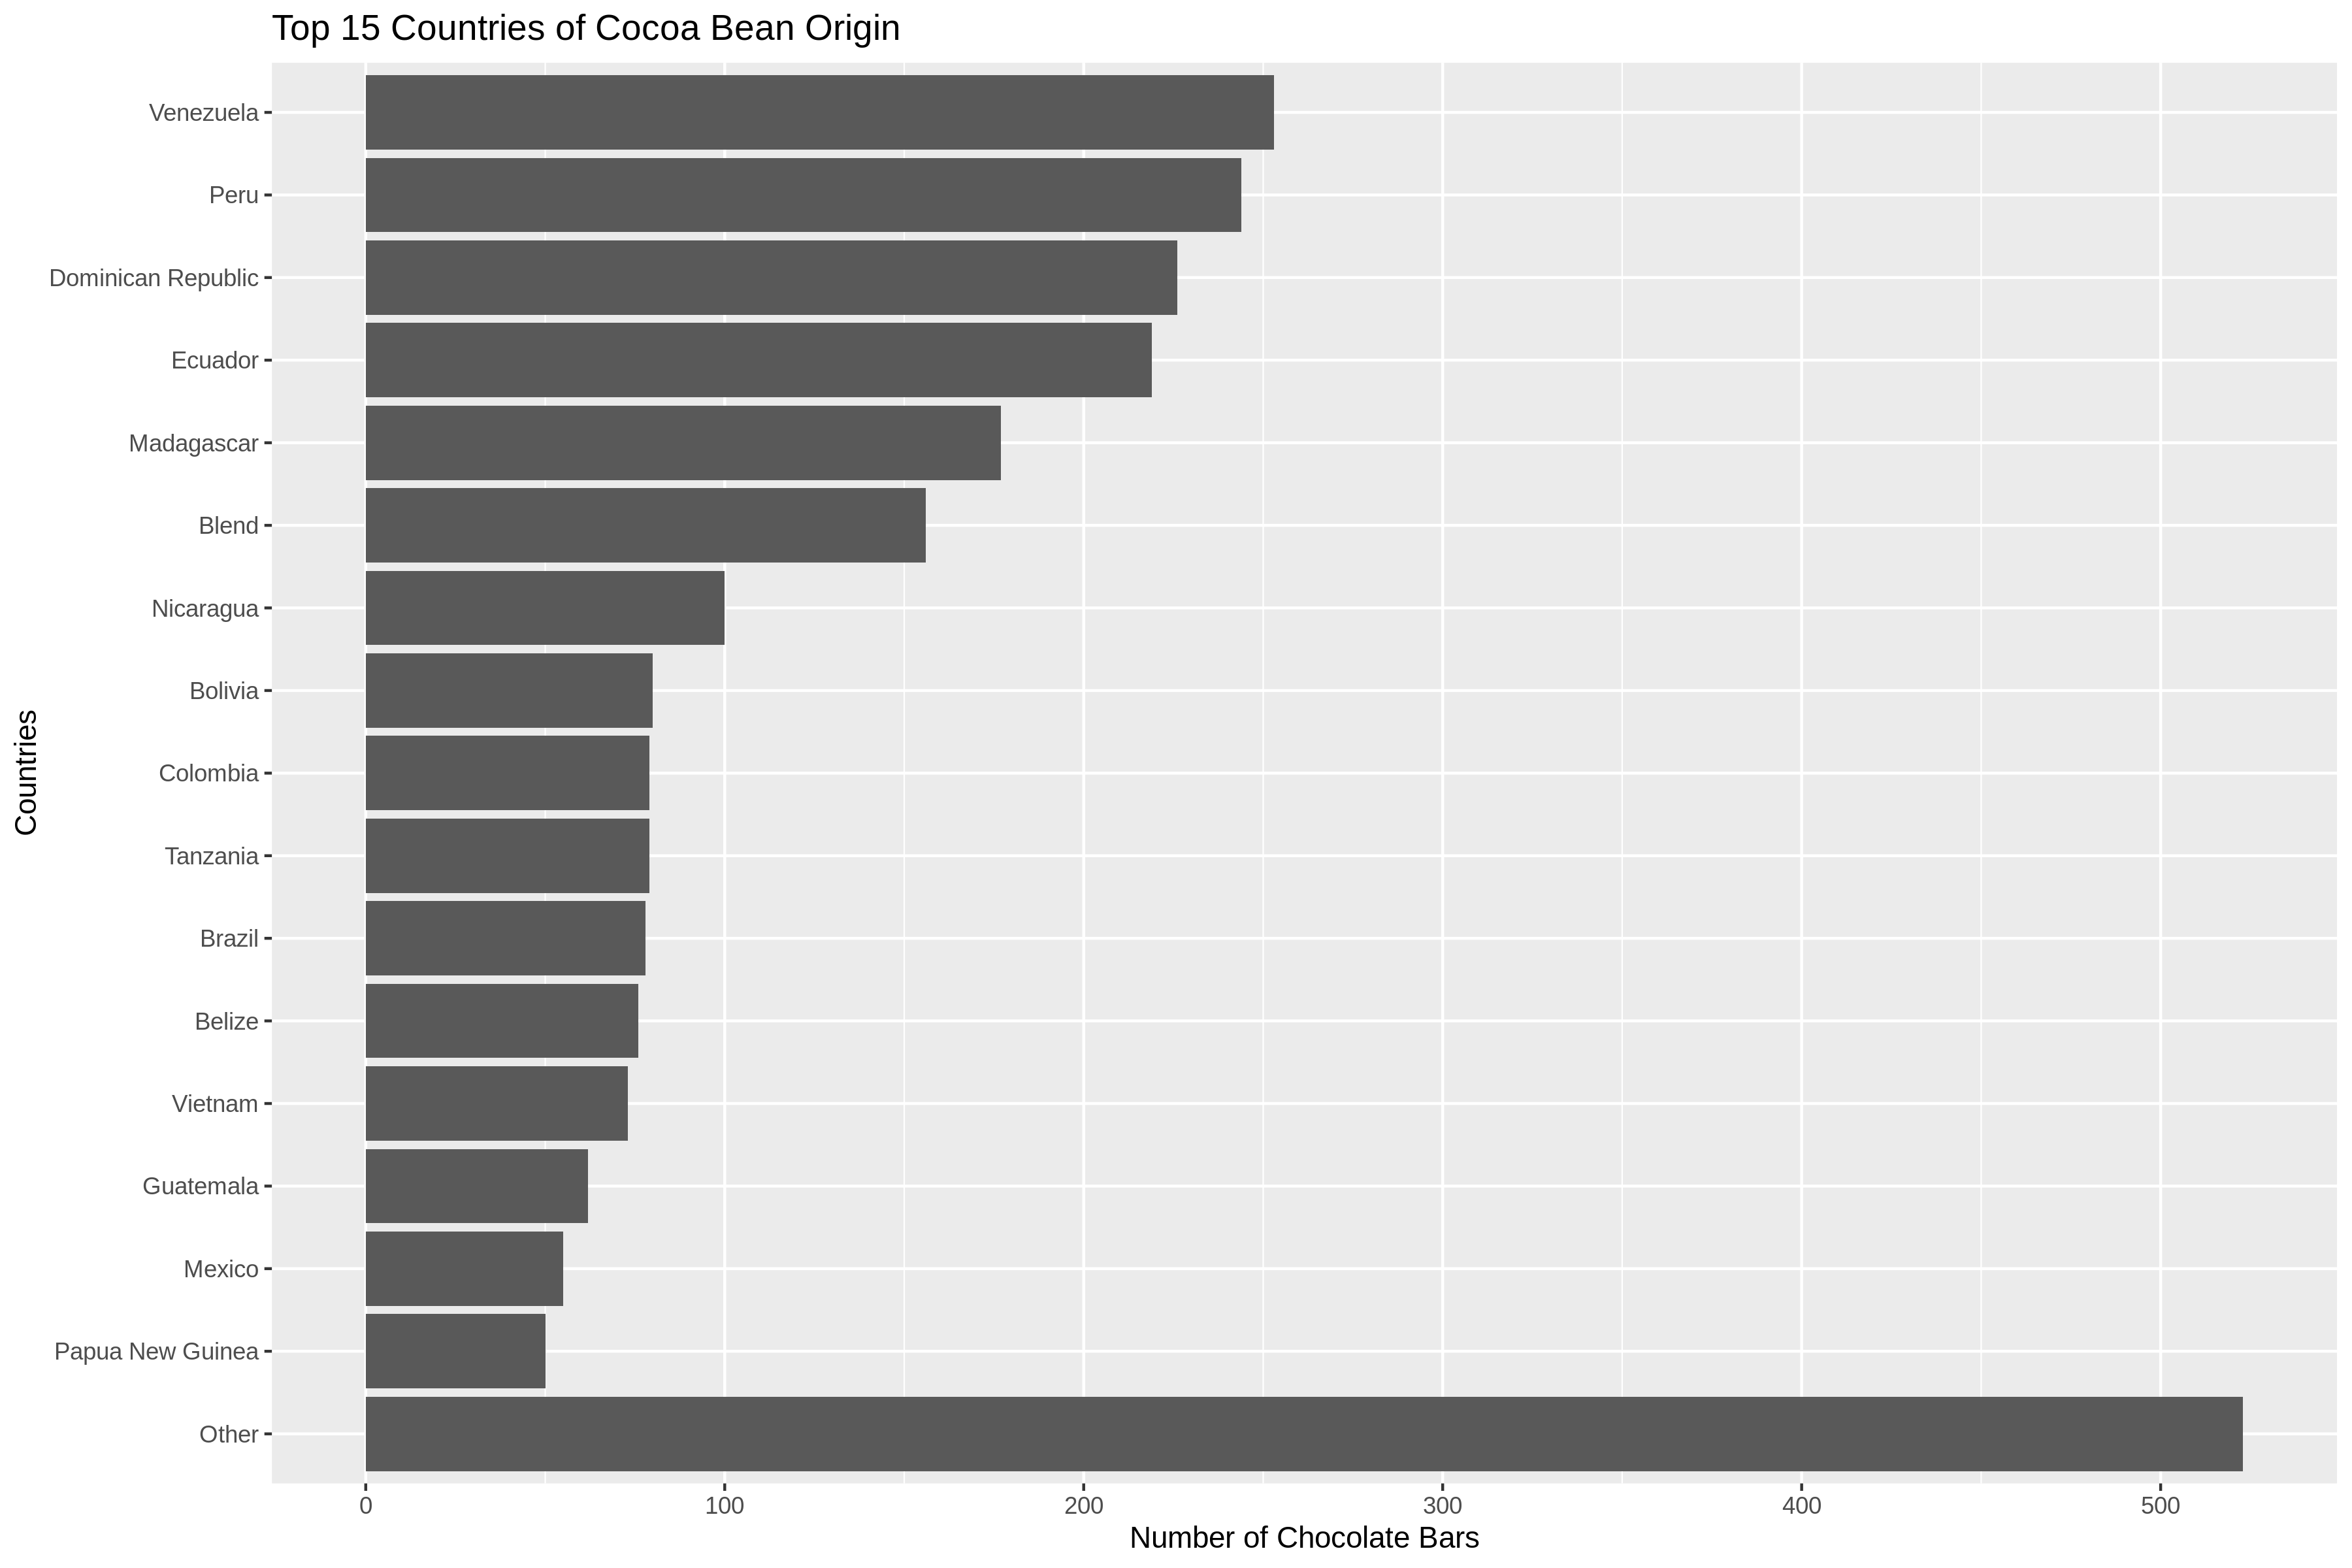

In [8]:
chocolate2 = chocolate |>
    mutate(country_of_bean_origin = country_of_bean_origin |>
        fct_lump(n = 16) |>
        fct_infreq() |> fct_rev() |>
        fct_relevel('Other'))

p = ggplot(chocolate2, aes(y = country_of_bean_origin)) + geom_bar() +
    labs(title = 'Top 15 Countries of Cocoa Bean Origin', x = 'Number of Chocolate Bars', y = 'Countries')

p
   

In [9]:
chocolate3 = chocolate2 |>
    mutate(company_manufacturer = company_manufacturer |>
        fct_lump(n = 20) |>
        fct_infreq() |> fct_rev() |>
        fct_relevel('Other'))
   

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


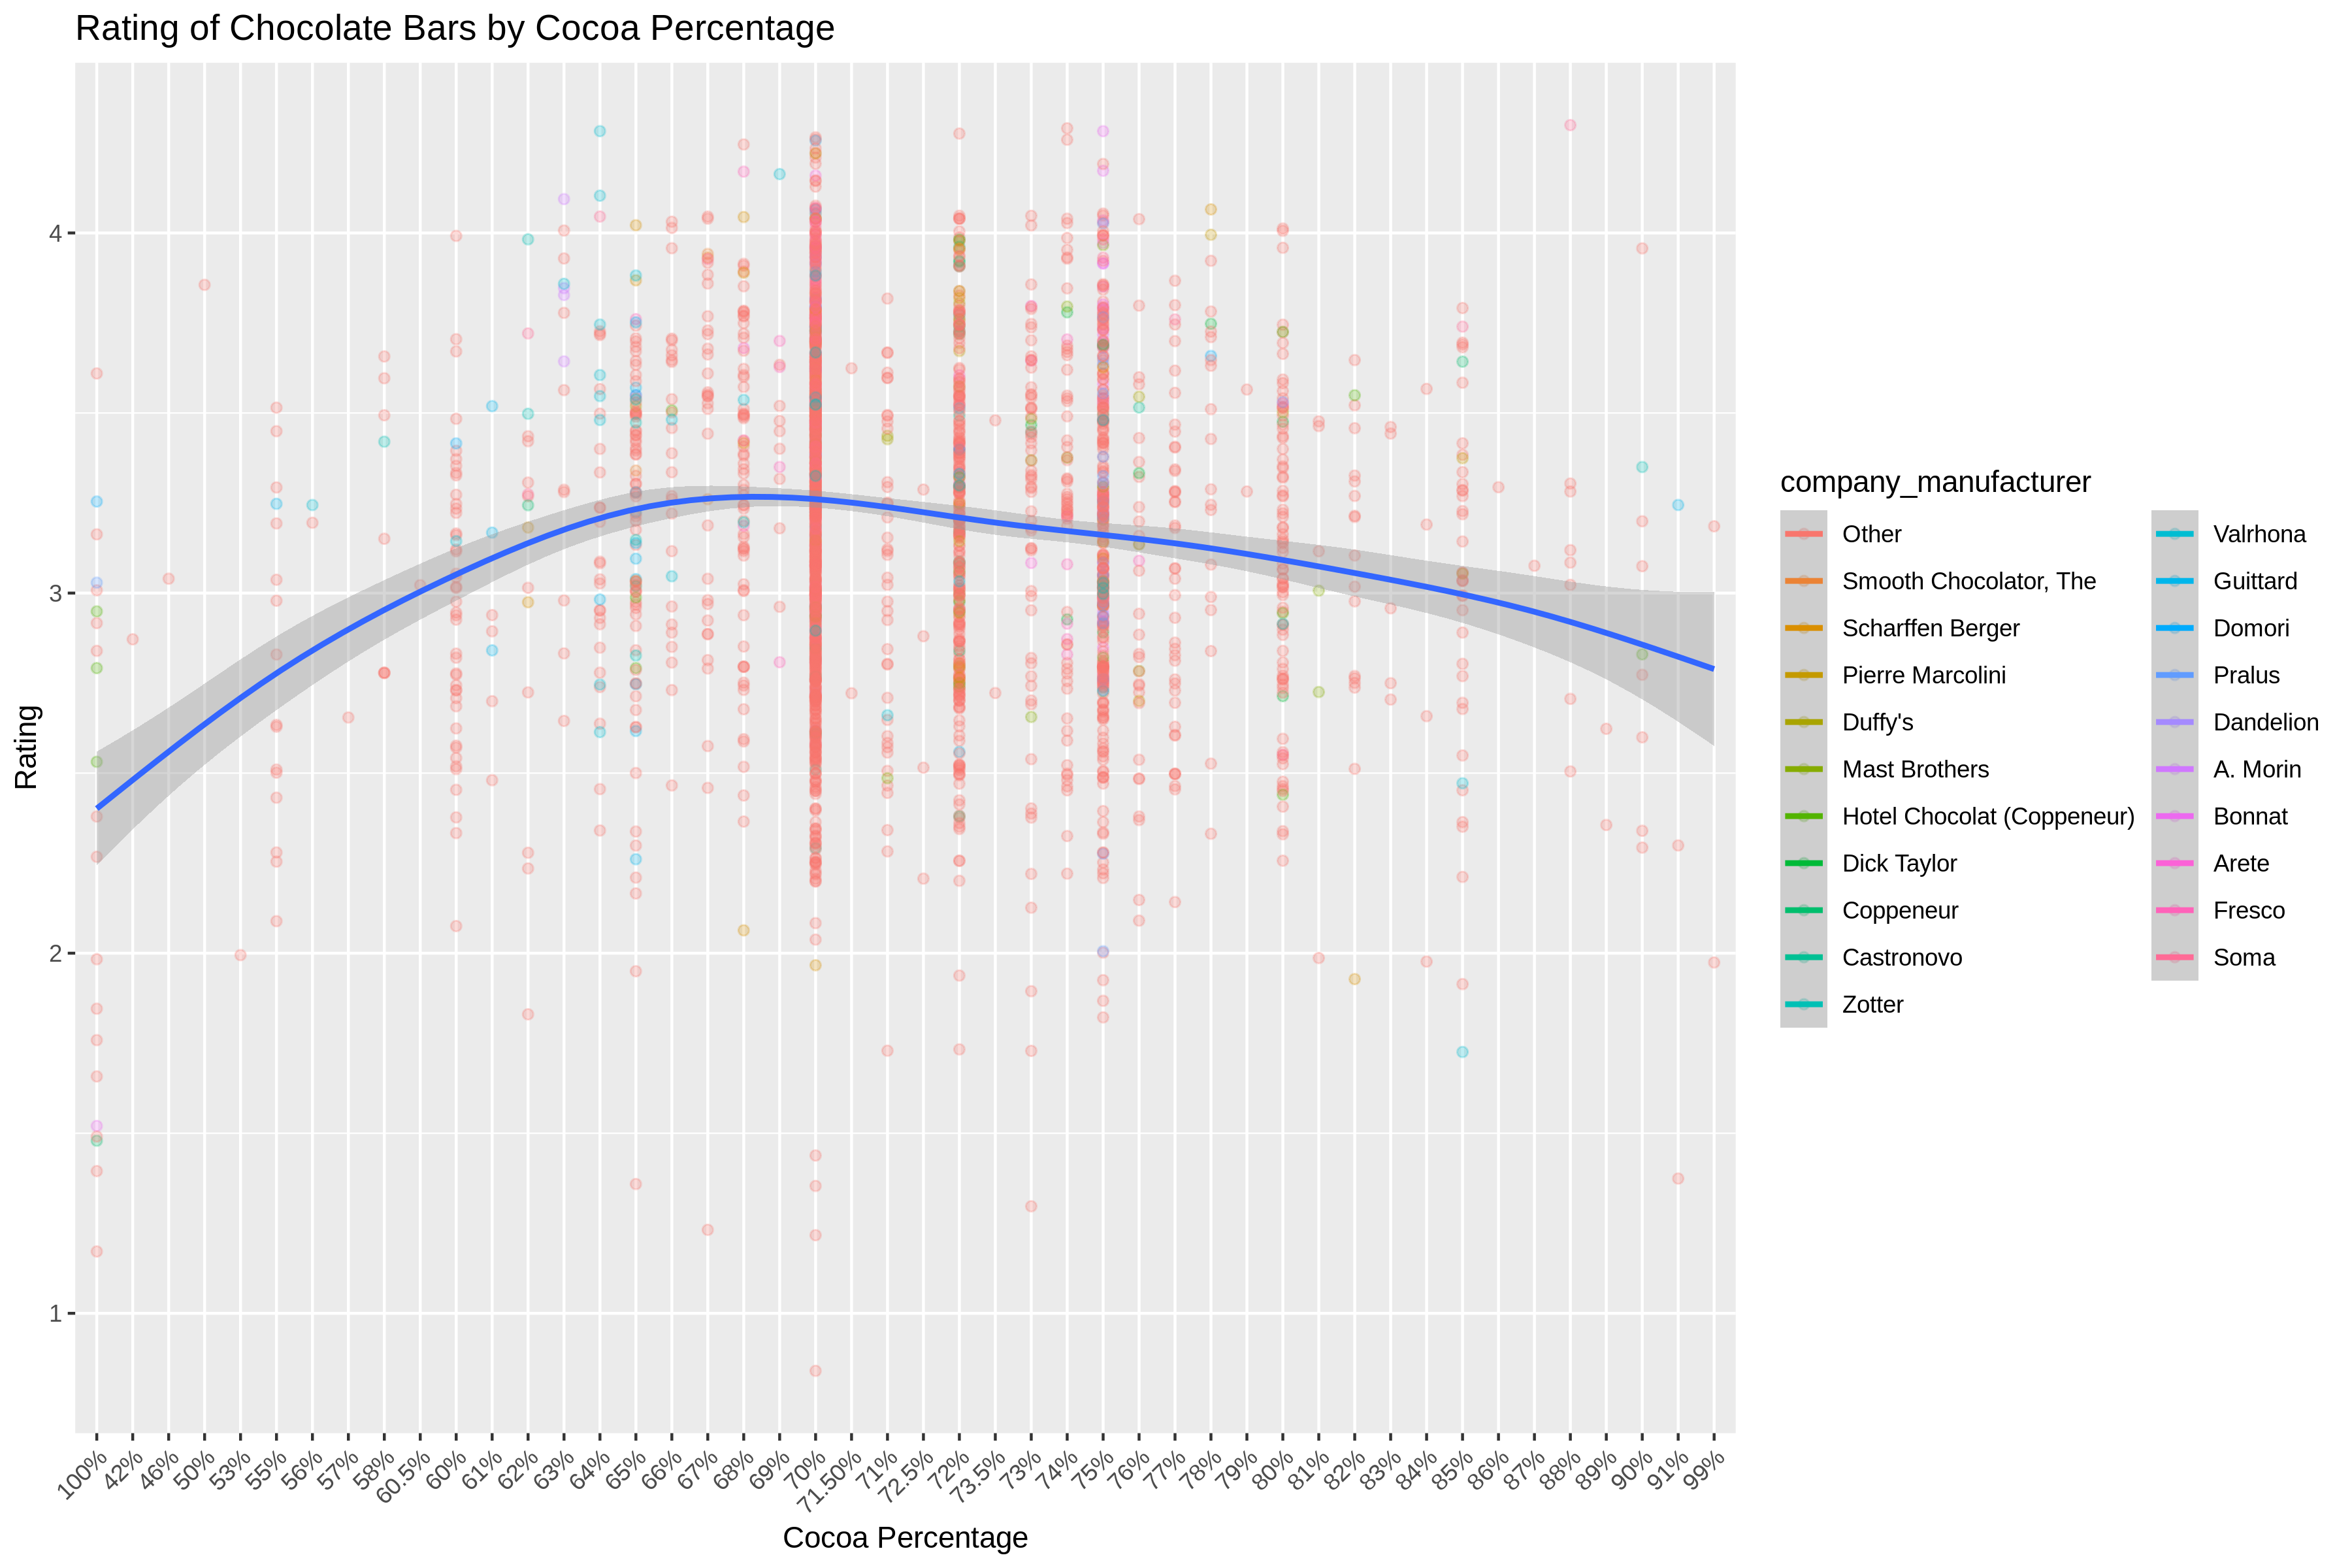

In [17]:
options(repr.plot.height = 8, repr.plot.width = 12)

p = ggplot(chocolate3, aes(x = cocoa_percent, y = rating, color = company_manufacturer)) + 
    geom_point(position = position_jitter(height = 0.3, width = 0), alpha = 0.25, na.rm = T) +
    geom_smooth(aes(group=1)) +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    labs(title = 'Rating of Chocolate Bars by Cocoa Percentage', y = 'Rating', x = 'Cocoa Percentage')

p

In [13]:
chocolate4 = chocolate3 |>
    group_by(review_date) |>
    mutate(rating = mean(rating))

chocolate4 |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
<dbl>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
2454,Other,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.134715
2458,Other,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.134715
2454,Other,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.134715
2542,Other,U.S.A.,2021,Other,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.320000
2546,Other,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.320000
2546,Other,U.S.A.,2021,Other,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.320000


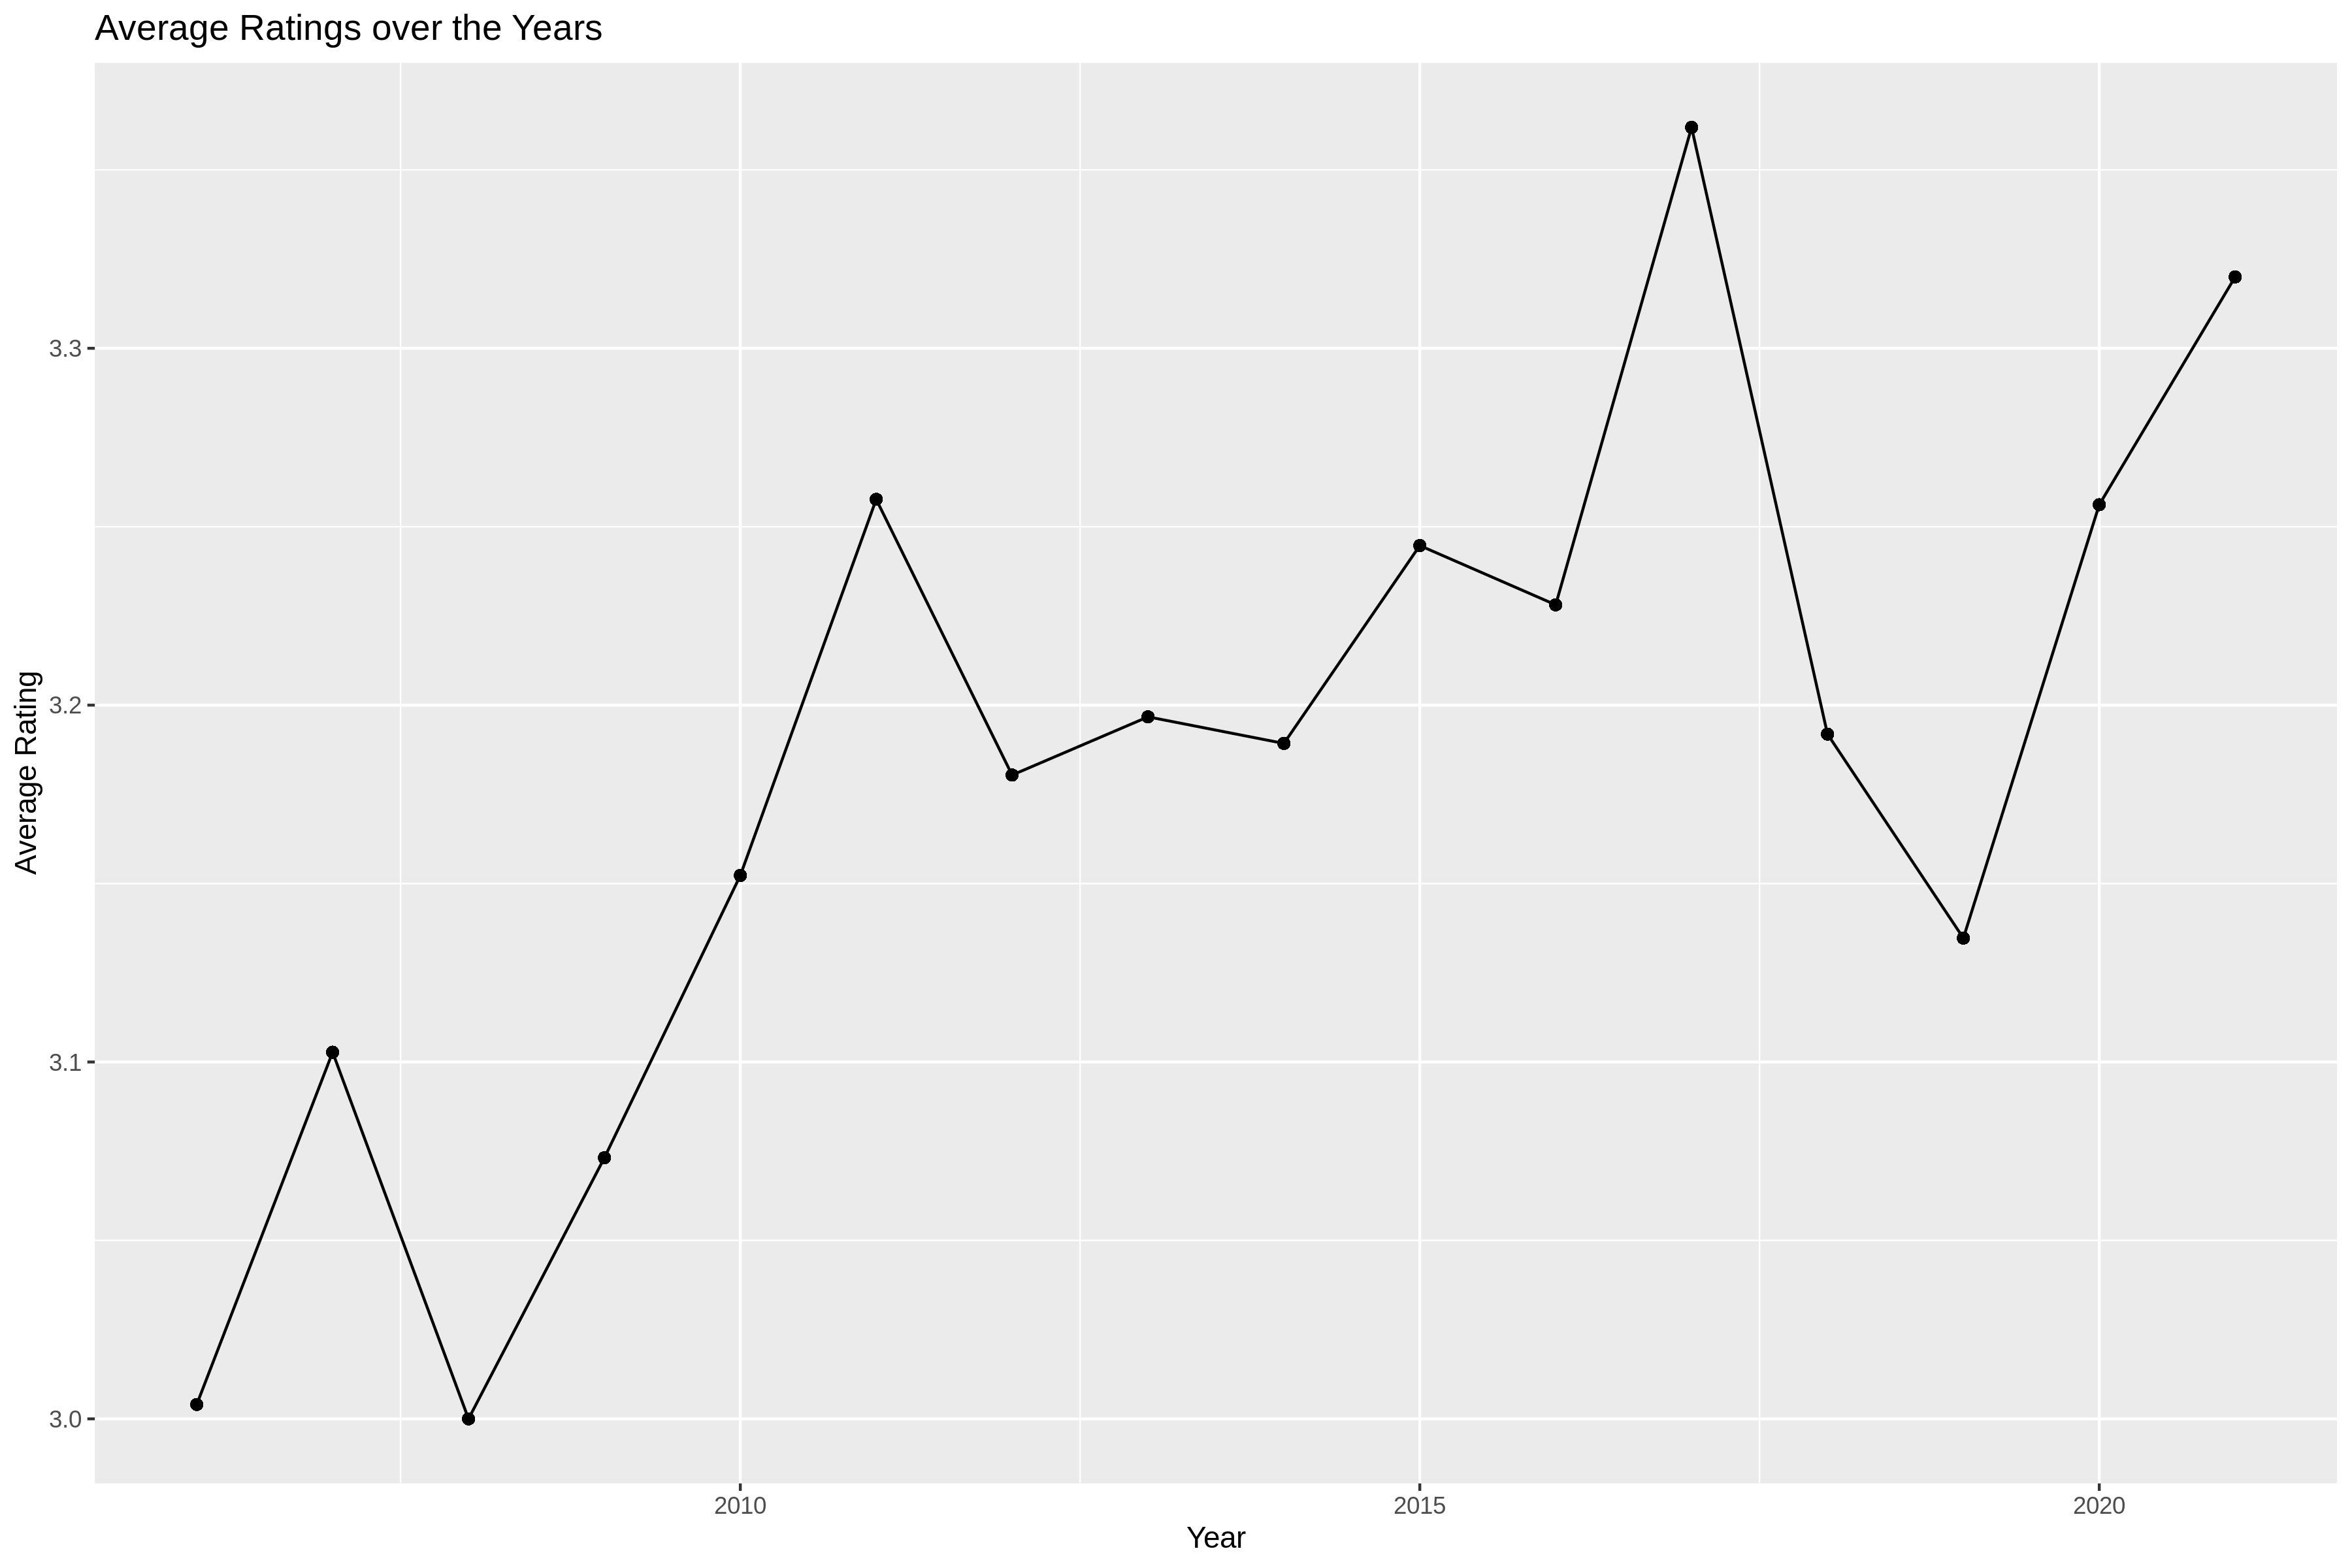

In [15]:
p = ggplot(chocolate4, aes(x = review_date, y = rating)) +
    geom_line() + geom_point() +
    labs(title = 'Average Ratings over the Years', x = 'Year', y = 'Average Rating')
p

While chocolate is one of the most popular treats in the world, it is important to establish that not all chocolate bars have the same quality. For the purpose of this analysis, I will examine the chocolate bar ratings to determine patterns in the quality of chocolate. In my first graph, I examined the top 15 countries of cocoa bean origin. While most chocolate bars fit within the ‘other’ category of cocoa bean origin, this graph shows us that the country of Venezuela produced the most cocoa beans for the rated chocolate bars. In addition, Peru and the Dominican Republic were the second and third most frequent countries to produce cocoa beans.

Next, I wanted to examine patterns among chocolate bar ratings and quality. Therefore, for my second graph, I examined the rating of chocolate bars by coca percentage. From this graph, I was able to determine that chocolate bars with cocoa percentages between 60%-70% had the highest rating compared to other cocoa percentages. In addition, it appears the rating seems to decrease as the cocoa percentage increases past 70%. Lastly, I calculated and graphed the average rating of chocolate from 2006-2021. From the graph, I found that 2008 had the lowest average rating at 3.0. Since 2008, the average ratings appear to gradually increase until its peak rating in 2017 at 3.35. However, the average rating seems to drastically drop in 2018 to around 3.2. 
